In [1]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)


## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)


In [5]:
#  3. Convert the June temperatures to a list.
june = june.all()
print(june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june, columns=['date', 'June Temps'])
june_df.set_index(june_df['date'], inplace=True)
print(june_df.to_string(index=False))

      date  June Temps
2010-06-01        78.0
2010-06-02        76.0
2010-06-03        78.0
2010-06-04        76.0
2010-06-05        77.0
2010-06-06        78.0
2010-06-07        77.0
2010-06-08        78.0
2010-06-09        78.0
2010-06-10        79.0
2010-06-11        78.0
2010-06-12        78.0
2010-06-13        78.0
2010-06-14        77.0
2010-06-15        78.0
2010-06-16        78.0
2010-06-17        77.0
2010-06-18        77.0
2010-06-19        82.0
2010-06-20        78.0
2010-06-21        78.0
2010-06-22        78.0
2010-06-23        78.0
2010-06-24        78.0
2010-06-25        77.0
2010-06-26        76.0
2010-06-27        78.0
2010-06-28        78.0
2010-06-29        78.0
2010-06-30        78.0
2011-06-01        77.0
2011-06-02        78.0
2011-06-03        73.0
2011-06-04        70.0
2011-06-05        76.0
2011-06-06        77.0
2011-06-07        77.0
2011-06-08        77.0
2011-06-09        77.0
2011-06-10        78.0
2011-06-11        77.0
2011-06-12        77.0
2011-06-13 

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

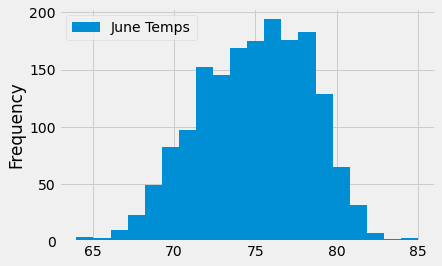

In [21]:
# Plot June Temps
june_df.plot.hist(bins=20)
plt.tight_layout

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
december = december.all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(december, columns=['date', 'December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)
print(dec_df.to_string(index=False))

      date  December Temps
2010-12-01            76.0
2010-12-03            74.0
2010-12-04            74.0
2010-12-06            64.0
2010-12-07            64.0
2010-12-08            67.0
2010-12-09            77.0
2010-12-10            66.0
2010-12-11            69.0
2010-12-12            68.0
2010-12-13            68.0
2010-12-14            71.0
2010-12-15            74.0
2010-12-16            67.0
2010-12-17            66.0
2010-12-18            69.0
2010-12-19            71.0
2010-12-23            70.0
2010-12-24            70.0
2010-12-26            74.0
2010-12-27            74.0
2010-12-28            71.0
2010-12-29            75.0
2010-12-30            75.0
2010-12-31            72.0
2011-12-01            69.0
2011-12-02            68.0
2011-12-03            73.0
2011-12-04            74.0
2011-12-05            73.0
2011-12-06            73.0
2011-12-07            73.0
2011-12-08            73.0
2011-12-09            71.0
2011-12-10            73.0
2011-12-11            73.0
2

In [27]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

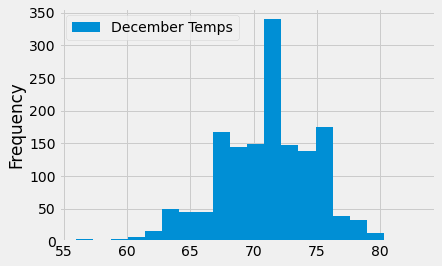

In [20]:
# Plot December Temps
dec_df.plot.hist(bins=20)
plt.tight_layout

## D3: Report for Statistical Analysis

In [14]:
# Additional queries, adding precipitation column for summary (June)
june1 = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()
june_temp_prcp_df = pd.DataFrame(june1, columns=['date', 'June Temps', 'June Prcp'])
june_temp_prcp_df.set_index(june_temp_prcp_df['date'], inplace=True)
print(june_temp_prcp_df.to_string(index=False))

      date  June Temps  June Prcp
2010-06-01        78.0       0.00
2010-06-02        76.0       0.01
2010-06-03        78.0       0.00
2010-06-04        76.0       0.00
2010-06-05        77.0       0.00
2010-06-06        78.0       0.00
2010-06-07        77.0       0.00
2010-06-08        78.0       0.00
2010-06-09        78.0       0.00
2010-06-10        79.0       0.00
2010-06-11        78.0       0.00
2010-06-12        78.0       0.00
2010-06-13        78.0       0.00
2010-06-14        77.0       0.00
2010-06-15        78.0       0.00
2010-06-16        78.0       0.00
2010-06-17        77.0       0.00
2010-06-18        77.0       0.00
2010-06-19        82.0       0.00
2010-06-20        78.0       0.00
2010-06-21        78.0       0.00
2010-06-22        78.0       0.00
2010-06-23        78.0       0.00
2010-06-24        78.0       0.00
2010-06-25        77.0       0.00
2010-06-26        76.0       0.02
2010-06-27        78.0       0.00
2010-06-28        78.0       0.00
2010-06-29    

In [23]:
june_temp_prcp_df.describe()

,June Temps,June Prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [16]:
december1 = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12)
print(december1)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [17]:
# Additional queries, adding precipitation column for summary (December)
december1 = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()
dec_temp_prcp_df = pd.DataFrame(december1, columns=['date', 'Dec Temps', 'Dec Prcp'])
dec_temp_prcp_df.set_index(dec_temp_prcp_df['date'], inplace=True)
print(dec_temp_prcp_df.to_string(index=False))


      date  Dec Temps  Dec Prcp
2010-12-01       76.0      0.04
2010-12-03       74.0      0.00
2010-12-04       74.0      0.00
2010-12-06       64.0      0.00
2010-12-07       64.0      0.00
2010-12-08       67.0      0.00
2010-12-09       77.0      0.00
2010-12-10       66.0      1.58
2010-12-11       69.0      0.77
2010-12-12       68.0      0.00
2010-12-13       68.0      0.00
2010-12-14       71.0      0.00
2010-12-15       74.0      0.00
2010-12-16       67.0      0.00
2010-12-17       66.0      0.00
2010-12-18       69.0      0.00
2010-12-19       71.0      1.40
2010-12-23       70.0      0.00
2010-12-24       70.0      0.00
2010-12-26       74.0       NaN
2010-12-27       74.0      0.13
2010-12-28       71.0      0.55
2010-12-29       75.0      0.06
2010-12-30       75.0      0.01
2010-12-31       72.0      0.00
2011-12-01       69.0      0.03
2011-12-02       68.0      0.08
2011-12-03       73.0      0.00
2011-12-04       74.0      0.00
2011-12-05       73.0      0.00
2011-12-

In [18]:
dec_temp_prcp_df.describe()

,Dec Temps,Dec Prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [28]:
march = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==3).all()
march_temp_prcp_df = pd.DataFrame(march, columns=['date', 'March Temps', 'March Prcp'])
march_temp_prcp_df.set_index(march_temp_prcp_df['date'], inplace=True)
print(march_temp_prcp_df.to_string(index=False))

      date  March Temps  March Prcp
2010-03-01         70.0        0.01
2010-03-02         72.0        0.00
2010-03-03         73.0        0.00
2010-03-04         70.0        0.12
2010-03-05         71.0        0.08
2010-03-06         72.0        0.03
2010-03-07         72.0        0.00
2010-03-08         69.0        0.43
2010-03-09         70.0        0.06
2010-03-11         73.0         NaN
2010-03-12         72.0        0.00
2010-03-13         73.0        0.00
2010-03-14         70.0        0.00
2010-03-15         71.0        0.06
2010-03-17         68.0        0.00
2010-03-18         70.0        0.00
2010-03-21         72.0        0.00
2010-03-22         69.0        0.00
2010-03-23         68.0        0.00
2010-03-24         74.0        0.00
2010-03-26         72.0         NaN
2010-03-27         72.0        0.00
2010-03-28         73.0        0.00
2010-03-29         74.0        0.00
2010-03-30         73.0        0.00
2010-03-31         73.0        0.00
2011-03-01         68.0     

In [29]:
march_temp_prcp_df.describe()

,March Temps,March Prcp
count,1693.000000,1566.000000
mean,70.059067,0.204227
std,3.845271,0.570625
min,56.000000,0.000000
25%,68.000000,0.000000
50%,70.000000,0.010000
75%,73.000000,0.120000
max,82.000000,6.380000


In [30]:
september = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==9).all()
sept_temp_prcp_df = pd.DataFrame(september, columns=['date', 'Sept Temps', 'Sept Prcp'])
sept_temp_prcp_df.set_index(sept_temp_prcp_df['date'], inplace=True)
print(sept_temp_prcp_df.to_string(index=False))

      date  Sept Temps  Sept Prcp
2010-09-01        77.0       0.00
2010-09-02        76.0       0.02
2010-09-03        78.0       0.04
2010-09-04        77.0       0.01
2010-09-05        77.0       0.00
2010-09-06        77.0       0.00
2010-09-07        76.0       0.06
2010-09-08        78.0       0.00
2010-09-09        78.0       0.00
2010-09-10        78.0       0.00
2010-09-11        78.0       0.05
2010-09-12        74.0       0.00
2010-09-13        78.0       0.00
2010-09-14        79.0       0.00
2010-09-15        77.0       0.00
2010-09-16        79.0       0.00
2010-09-17        78.0       0.00
2010-09-19        78.0       0.00
2010-09-20        78.0       0.00
2010-09-21        79.0       0.00
2010-09-22        76.0       0.04
2010-09-23        78.0       0.00
2010-09-24        78.0       0.00
2010-09-25        79.0       0.00
2010-09-26        74.0       0.00
2010-09-27        75.0       0.00
2010-09-28        75.0       0.00
2010-09-29        78.0       0.00
2010-09-30    

In [31]:
sept_temp_prcp_df.describe()

,Sept Temps,Sept Prcp
count,1480.000000,1379.000000
mean,76.164865,0.164249
std,3.535178,0.437928
min,64.000000,0.000000
25%,74.000000,0.000000
50%,76.000000,0.020000
75%,79.000000,0.150000
max,87.000000,6.830000
